In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white", color_codes=True)
%matplotlib inline

In [4]:
data=pd.read_csv('Iris.csv')

In [5]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.1+ KB


In [8]:
data.shape

(150, 6)

In [9]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [10]:
print(data.Species.unique())

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [12]:
print(data.groupby(by='Species',as_index= False)["Id"].count())

           Species  Id
0      Iris-setosa  50
1  Iris-versicolor  50
2   Iris-virginica  50


In [14]:
print(data.Species.value_counts())

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64


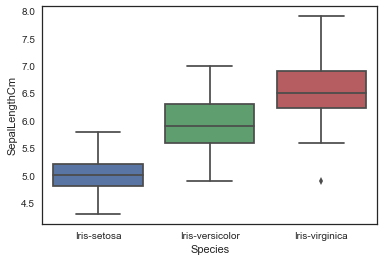

In [20]:
sns.boxplot(x="Species",y="SepalLengthCm",data=data)

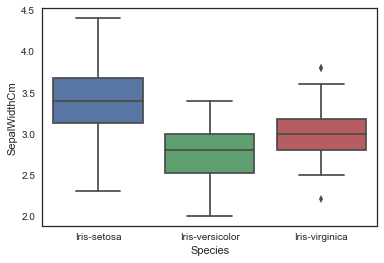

In [21]:
sns.boxplot(x="Species",y="SepalWidthCm",data=data)

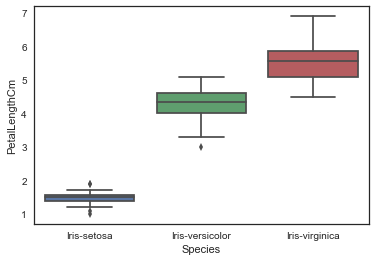

In [22]:
sns.boxplot(x="Species",y="PetalLengthCm",data=data)

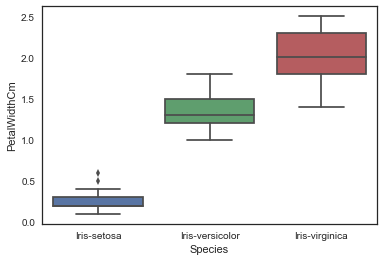

In [23]:
sns.boxplot(x="Species",y="PetalWidthCm",data=data)

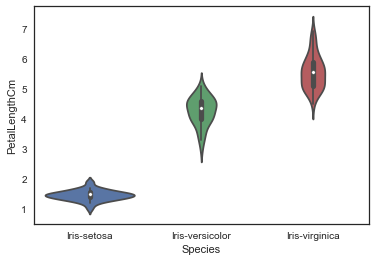

In [27]:
sns.violinplot(x="Species",y="PetalLengthCm",data=data)

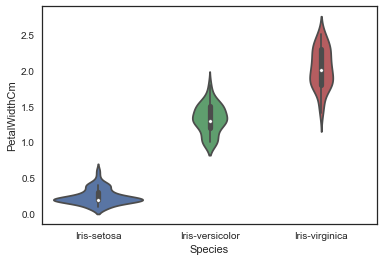

In [25]:
sns.violinplot(x="Species",y="PetalWidthCm",data=data)

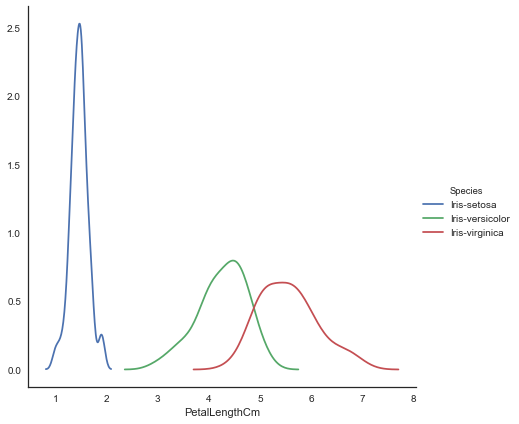

In [28]:
sns.FacetGrid(data,hue="Species",size=6).map(sns.kdeplot,"PetalLengthCm").add_legend()

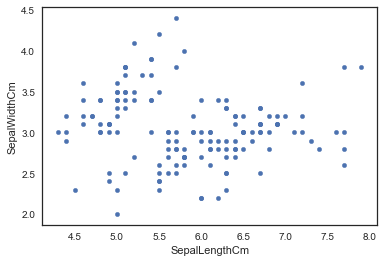

In [15]:
#relationship between SepalLengthCm and SepalWidthCm
data.plot(kind="scatter", x="SepalLengthCm", y="SepalWidthCm")

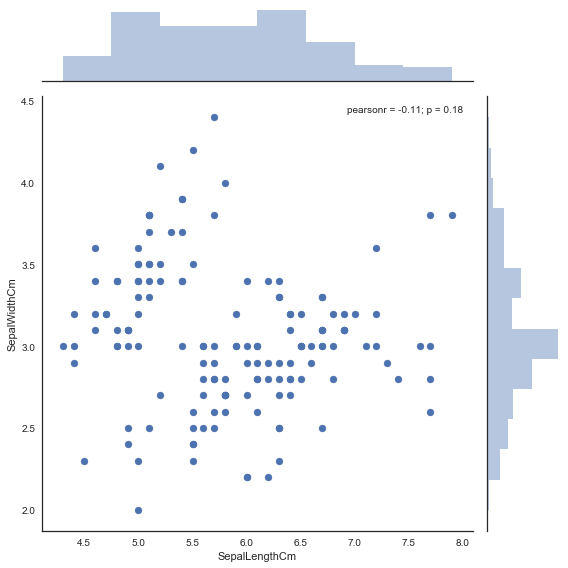

In [17]:
sns.jointplot(x="SepalLengthCm", y="SepalWidthCm",data=data,size=8)

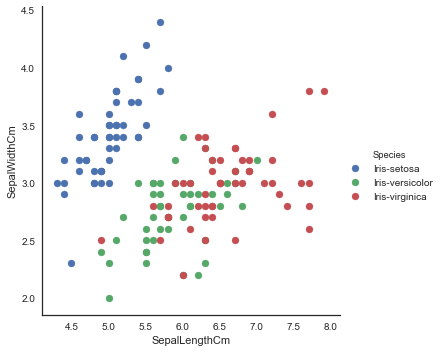

In [19]:
sns.FacetGrid(data,hue="Species",size=5).map(plt.scatter, "SepalLengthCm","SepalWidthCm").add_legend()

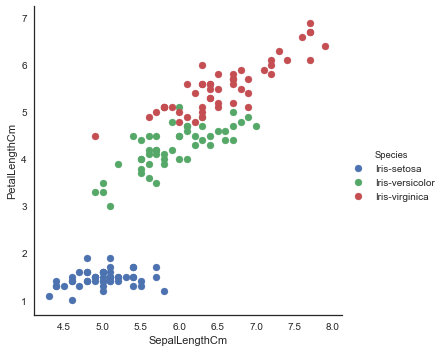

In [24]:
sns.FacetGrid(data,hue="Species",size=5).map(plt.scatter, "SepalLengthCm","PetalLengthCm").add_legend()

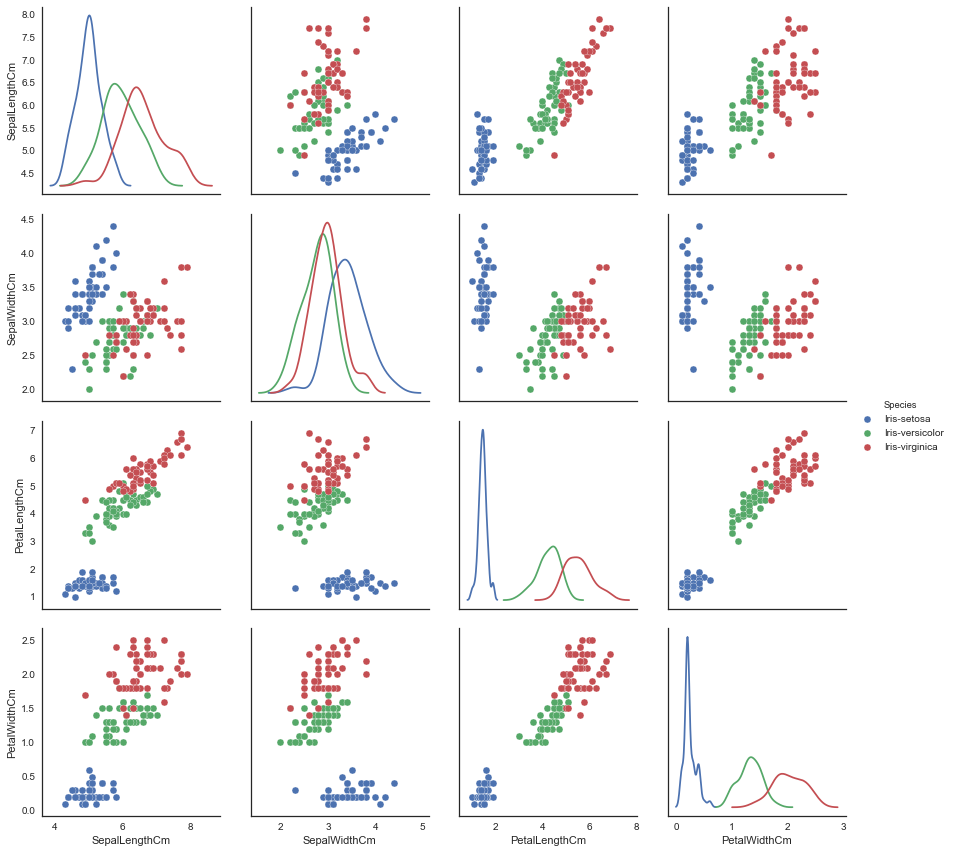

In [30]:
sns.pairplot(data.drop("Id",axis=1),hue="Species",size=3,diag_kind="kde")

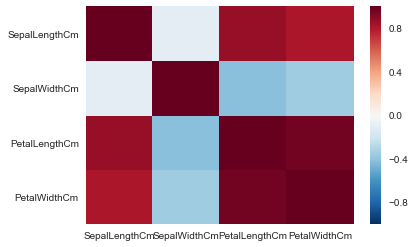

In [31]:
corr_matrix=data[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm','PetalWidthCm']].corr()
sns.heatmap(corr_matrix)

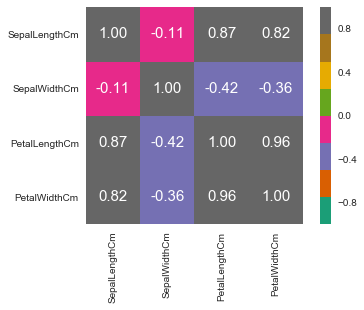

In [35]:
sns.heatmap(corr_matrix,cbar=True,annot=True,square=True,fmt='.2f',annot_kws={'size':
15},yticklabels=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm','PetalWidthCm'],
xticklabels=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm','PetalWidthCm'],cmap='Dark2')

In [36]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
le.fit(['Iris-setosa','Iris-versicolor','Iris-virginica'])
names =["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"]

X = data[names]
Y = data["Species"]
Z=le.transform(Y)

rf = RandomForestRegressor()
rf.fit(X, Z)
print "Features sorted by their score:"
print sorted(zip(map(lambda x: round(x, 4), rf.feature_importances_), names), 
             reverse=True)

Features sorted by their score:
[(0.7243, 'PetalLengthCm'), (0.2607, 'PetalWidthCm'), (0.0092, 'SepalWidthCm'), (0.0059, 'SepalLengthCm')]
